In [2]:
%matplotlib notebook

In [15]:
#import the necessaries libraires
import matplotlib.pyplot as plt 
from skimage import data
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data
astronaut=data.astronaut()
ihc=data.immunohistochemistry()
hubble=data.hubble_deep_field()

<IPython.core.display.Javascript object>


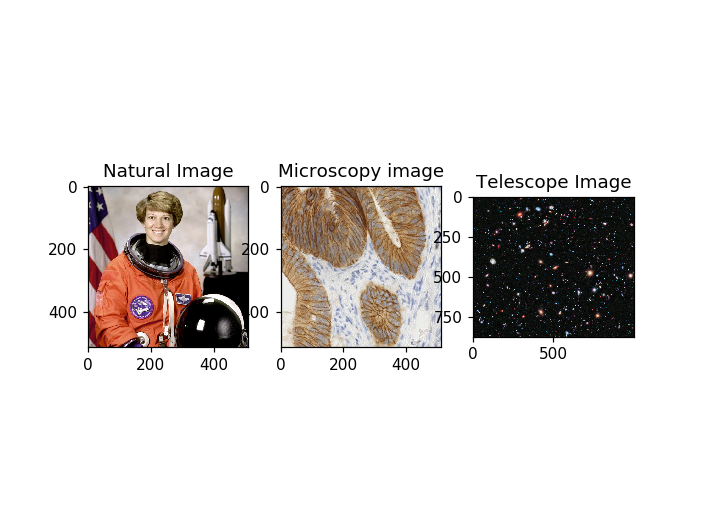

Text(0.5, 1.0, 'Telescope Image')

In [7]:
# Initialize the subplot panels side by side
fig, ax=plt.subplots(nrows=1, ncols=3)

# Show an image in each suplots 
ax[0].imshow(astronaut)
ax[0].set_title('Natural Image')
ax[1].imshow(ihc)
ax[1].set_title('Microscopy image')
ax[2].imshow(hubble)
ax[2].set_title('Telescope Image')

These images are called 2-dimensional or 2D images because they are laid out along 2 dimensions: x and y, or, in NumPy parlance, rows and columns or r and c.

Some images are 3D, in that they have an additional depth dimension (z, or planes). These include magnetic resonance imaging (MRI) and serial section transmission electron microscopy (ssTEM), in which a sample is thinly sliced, like a salami, and each of the slices is imaged separately.

To view such images in matplotlib, we have to choose a slice, and display only that slice. Let’s try it out on some freely available MRI data online.



##### Interlude : Getting the Data (3D Imaging)

We’re going to download a dataset described in Buchel and Friston, Cortical Interactions Evaluated with Structural Equation Modelling and fMRI (1997). First, we create a temporary directory in which to download the data. We must remember to delete it when we are done with our analysis! If you want to keep this dataset for later use, change d to a more permanent directory location of your choice.

In [8]:
import tempfile

# create a temporary direcotry 
d=tempfile.mkdtemp()

Now, let's download the data :

In [9]:
import os 

# Return the tail of the path 
os.path.basename('http://google.com/attention.zip')

'attention.zip'

In [10]:
from urllib.request import urlretrieve

# Define URL
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'

# Retrieve the data
fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))

And extract it form the zip file to our temporary directory

In [11]:
import zipfile

#Extract the contents into the temporary directory we created earlier 
zipfile.ZipFile(fn).extractall(path=d)

if you look at the actual content of the file, you'll find a buch of .hdr and .img files.

In [12]:
# List first 10 files
[f.filename for f in zipfile.ZipFile(fn).filelist[:10]]

['attention/',
 'attention/multi_block_regressors.mat',
 'attention/README_DATA.txt',
 'attention/factors.mat',
 'attention/functional/',
 'attention/functional/snffM00587_0201.hdr',
 'attention/functional/snffM00587_0040.img',
 'attention/functional/snffM00587_0458.hdr',
 'attention/functional/snffM00587_0185.img',
 'attention/functional/snffM00587_0018.hdr']

These are in the NIfTI file format, and we’ll need a reader for them. Thankfully, the excellent nibabel library provides such a reader.

In [13]:
import nibabel

Now, we can finally read our image, and use the .get_data() method to get a NumPy array to view

In [16]:
# Read the image 
struct = nibabel.load(os.path.join(d, 'attention/structural/nsM00587_0002.hdr'))

# Get a plain NumPy array, without all the metadata
struct_arr = struct.get_data()

In [17]:
struct_arr

array([[[ 4.375,  4.75 ,  4.75 , ...,  0.   ,  0.   ,  0.   ],
        [ 1.75 ,  7.625,  2.875, ...,  0.   ,  0.   ,  0.   ],
        [ 4.5  ,  7.25 ,  3.875, ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 4.25 ,  7.   ,  4.   , ...,  1.5  ,  1.5  ,  1.625],
        [ 4.5  ,  2.625,  4.875, ...,  1.125,  4.125,  3.75 ],
        [ 3.875,  3.625,  4.125, ...,  2.625,  5.5  ,  3.25 ]],

       [[ 4.875,  5.5  ,  5.875, ...,  0.   ,  0.   ,  0.   ],
        [ 2.375,  3.5  ,  4.625, ...,  0.   ,  0.   ,  0.   ],
        [ 8.625,  2.375,  5.   , ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 3.25 ,  4.625,  3.625, ...,  1.625,  2.375,  3.375],
        [ 4.25 ,  4.375,  5.625, ...,  1.375,  4.5  ,  2.25 ],
        [ 5.125,  1.5  ,  4.   , ...,  1.625,  5.125,  3.875]],

       [[ 4.125,  5.375,  5.375, ...,  0.   ,  0.   ,  0.   ],
        [ 3.375,  5.   ,  3.125, ...,  0.   ,  0.   ,  0.   ],
        [ 6.25 ,  1.125,  4.75 , ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 1.

Tip: if you want to directly continue to plotting the MRI data, execute the following lines of code:

In [18]:
from skimage import io

struct_arr2 = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")

In [19]:
struct_arr2

array([[[ 4.375,  4.75 ,  4.75 , ...,  0.   ,  0.   ,  0.   ],
        [ 1.75 ,  7.625,  2.875, ...,  0.   ,  0.   ,  0.   ],
        [ 4.5  ,  7.25 ,  3.875, ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 4.25 ,  7.   ,  4.   , ...,  1.5  ,  1.5  ,  1.625],
        [ 4.5  ,  2.625,  4.875, ...,  1.125,  4.125,  3.75 ],
        [ 3.875,  3.625,  4.125, ...,  2.625,  5.5  ,  3.25 ]],

       [[ 4.875,  5.5  ,  5.875, ...,  0.   ,  0.   ,  0.   ],
        [ 2.375,  3.5  ,  4.625, ...,  0.   ,  0.   ,  0.   ],
        [ 8.625,  2.375,  5.   , ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 3.25 ,  4.625,  3.625, ...,  1.625,  2.375,  3.375],
        [ 4.25 ,  4.375,  5.625, ...,  1.375,  4.5  ,  2.25 ],
        [ 5.125,  1.5  ,  4.   , ...,  1.625,  5.125,  3.875]],

       [[ 4.125,  5.375,  5.375, ...,  0.   ,  0.   ,  0.   ],
        [ 3.375,  5.   ,  3.125, ...,  0.   ,  0.   ,  0.   ],
        [ 6.25 ,  1.125,  4.75 , ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 1.

#### Back To Plotting 

Let's now book at a slice of array

<IPython.core.display.Javascript object>


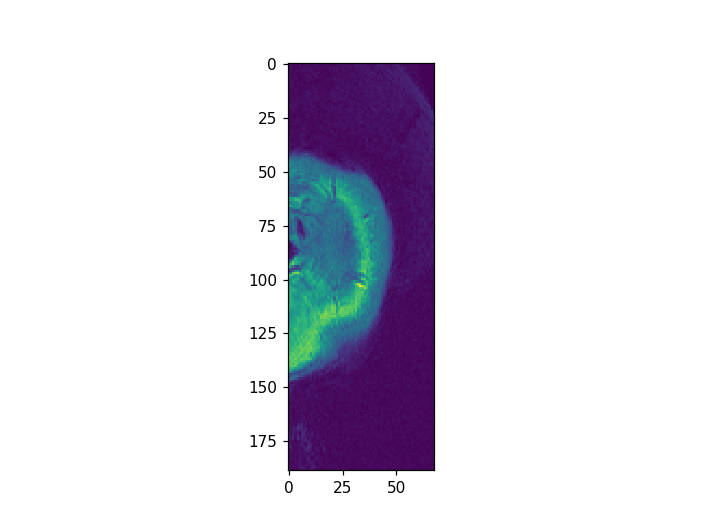

In [20]:
# Slice 
plt.imshow(struct_arr[0])

<IPython.core.display.Javascript object>


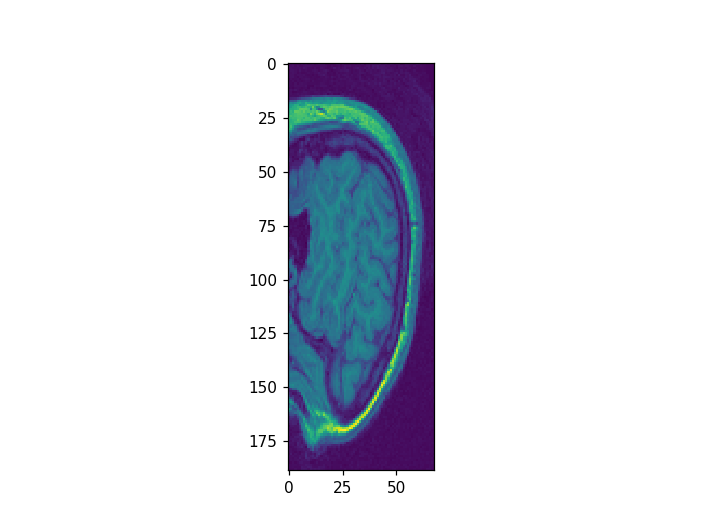

In [21]:
# Another slice 
plt.imshow(struct_arr[20])

<IPython.core.display.Javascript object>


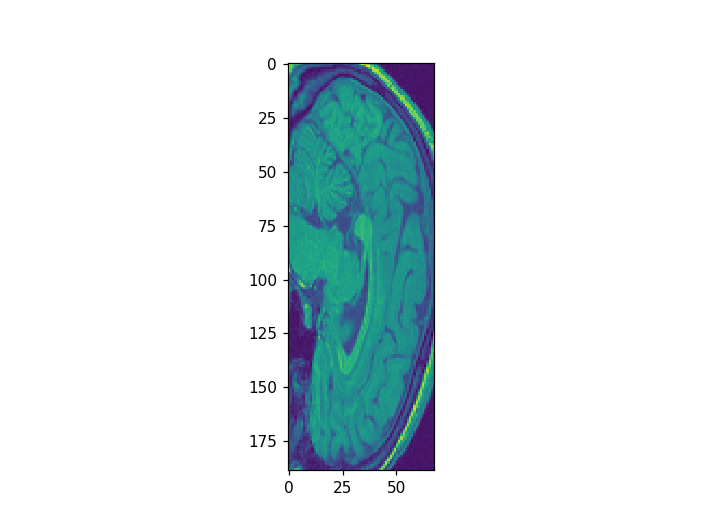

In [22]:
# An another slice so on.
plt.imshow(struct_arr[75])

Whoa! That looks pretty squishy! That’s because the resolution along the vertical axis in many MRIs is not the same as along the horizontal axes. We can fix that by passing the aspect parameter to the imshow function:

<IPython.core.display.Javascript object>


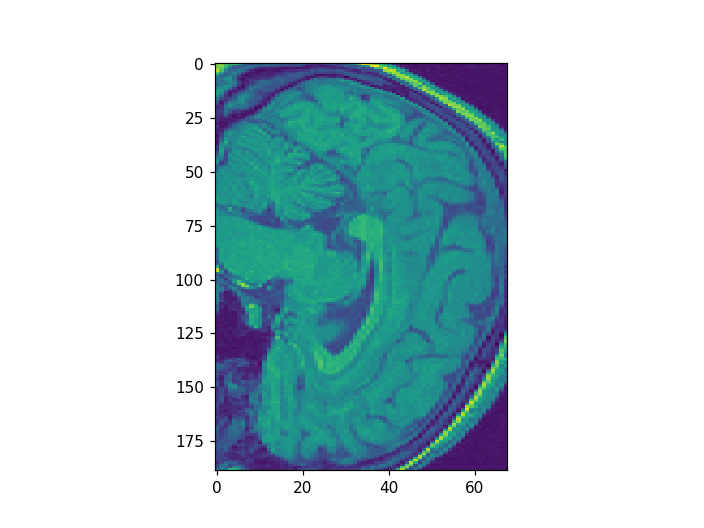

In [23]:
plt.imshow(struct_arr[75], aspect=0.5)

But, to make things easier, we will just transpose the data and only look at the horizontal slices, which don’t need such fiddling.

<IPython.core.display.Javascript object>


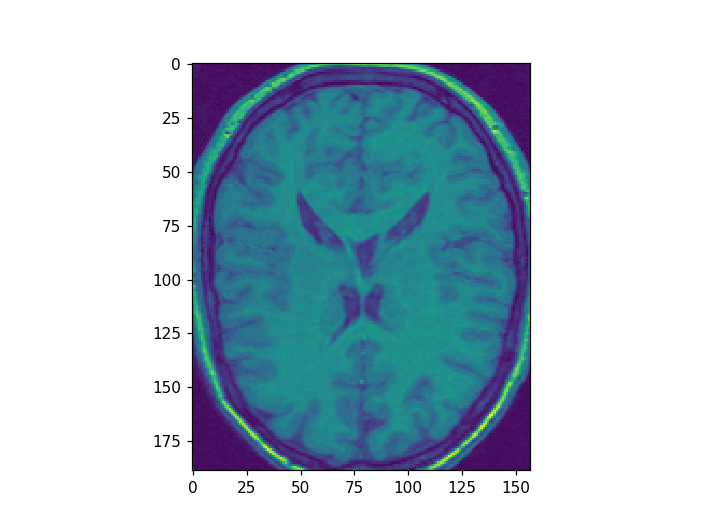

In [24]:
struct_arr2 = struct_arr.T
plt.imshow(struct_arr2[34])

Pretty! Of course, to then view another slice, or a slice along a different axis, we need another call to imshow:

<IPython.core.display.Javascript object>


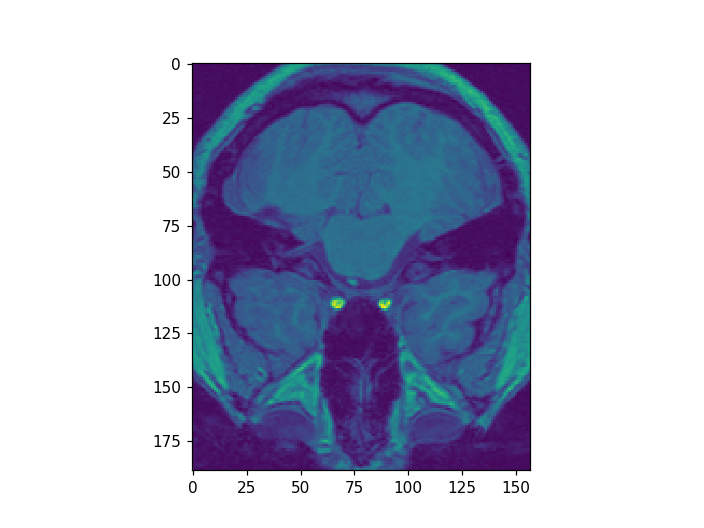

In [25]:
plt.imshow(struct_arr2[5])

All these calls get rather tedious rather quickly. For a long time, I would view 3D volumes using tools outside Python, such as ITK-SNAP. But, as it turns out, it’s quite easy to add 3D “scrolling” capabilities to the matplotlib viewer! This lets us explore 3D data within Python, minimizing the need to switch contexts between data exploration and data analysis.

The key is to use the matplotlib event handler API, which lets us define actions to perform on the plot — including changing the plot’s data! — in response to particular key presses or mouse button clicks.

In our case, let’s bind the J and K keys on the keyboard to “previous slice” and “next slice”:

In [26]:
def previous_slice():
    pass

def next_slice():
    pass

def process_key(event):
    if event.key == 'j':
        previous_slice()
    elif event.key == 'k':
        next_slice()

Simple enough! Of course, we need to figure out how to actually implement these actions and we need to tell the figure that it should use the process_key function to process keyboard presses! The latter is simple: we just need to use the figure canvas method mpl_connect:

<IPython.core.display.Javascript object>


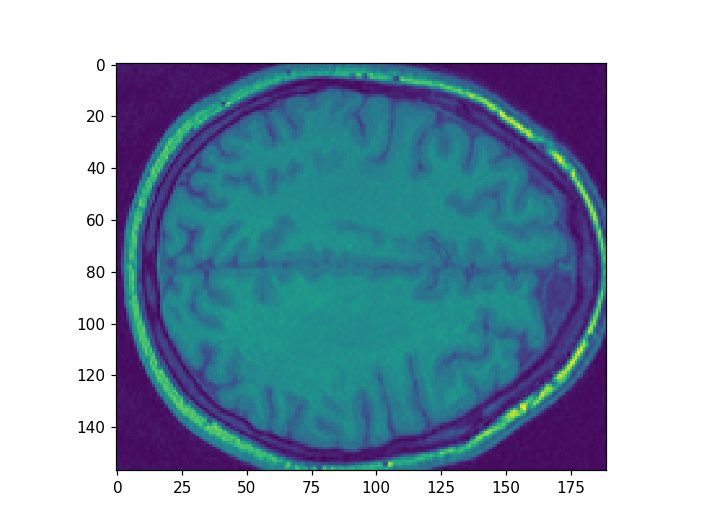

7

In [27]:
fig, ax = plt.subplots()
ax.imshow(struct_arr[..., 43])
fig.canvas.mpl_connect('key_press_event', process_key)

It took me just a bit of exploring to find out that imshow returns an AxesImage object, which lives “inside” the matplotlib Axes object where all the drawing takes place, in its .images attribute. And this object provides a convenient set_array method that swaps out the image data being displayed! So, all we need to do is:

- plot an arbitrary index, and store that index, maybe as an additional runtime attribute on the Axes object.

- provide functions next_slice and previous_slice that change the index and uses set_array to set the corresponding slice of the 3D volume.

- use the figure canvas draw method to redraw the figure with the new data.

In [28]:
def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

Let’s try it out!

<IPython.core.display.Javascript object>


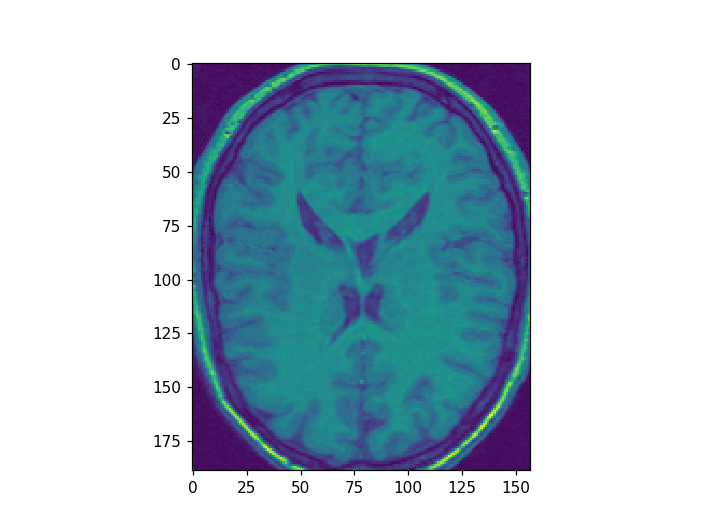

In [29]:
multi_slice_viewer(struct_arr2)

This works! Nice! But, if you try this out at home, you’ll notice that scrolling up with K also squishes the horizontal scale of the plot. Huh? (This only happens if your mouse is over the image.)

What’s happening is that adding event handlers to Matplotlib simply piles them on on top of each other. In this case, K is a built-in keyboard shortcut to change the x-axis to use a logarithmic scale. If we want to use K exclusively, we have to remove it from matplotlib’s default key maps. These live as lists in the plt.rcParams dictionary, which is matplotlib’s repository for default system-wide settings:

In [31]:
#plt.rcParams['keymap.<command>'] = ['<key1>', '<key2>']

where pressing any of the keys in the list (i.e. <key1> or <key2>) will cause <command> to be executed.

Thus, we’ll need to write a helper function to remove keys that we want to use wherever they may appear in this dictionary. (This function doesn’t yet exist in matplotlib, but would probably be a welcome contribution!)

In [32]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

###### A Fully Functional Slice Viewer

Ok, let’s rewrite our function to make use of this new tool:

In [33]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

Now, we should be able to view all the slices in our MRI volume without pesky interference from the default keymap!

<IPython.core.display.Javascript object>


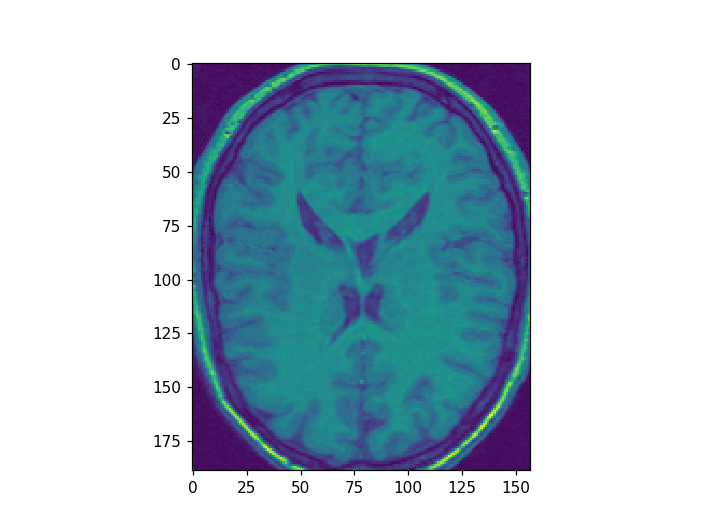

In [34]:
multi_slice_viewer(struct_arr2)

One nice feature about this method is that it works on any matplotlib backend! So, if you try this out in the IPython terminal console, you will still get the same interaction as you did in the browser! And the same is true for a Qt or Tkinter app embedding a matplotlib plot. This simple tool therefore lets you build ever more complex applications around matplotlib’s visualization capabilities.

###### Before You Go… 

Let’s not forget to clean up after ourselves, and delete the temporary directory (if you made one):

In [35]:
import shutil

# Remove the temporary directory
shutil.rmtree(d)